In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df = pd.read_csv('Udemy_Courses.csv',parse_dates=['published_timestamp'])



Display Top 10 Rows of The Dataset

In [191]:
df.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

Check Last 5 Rows of The Dataset

In [192]:
df.tail(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26 16:45:55+00:00,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26 22:19:48+00:00,Graphic Design


 Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [193]:
df.shape

(3682, 11)

In [194]:
print('Number of rows', df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 3682
Number of columns 11


Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   object             
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 291.4+ KB


Check Null Values In The Datase

In [196]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

 Check For Duplicate Data and Drop Them

In [197]:
df.duplicated().sum()


6

In [198]:
df = df.drop_duplicates()

In [199]:
df.duplicated().sum()

0

Find Out Number of Courses Per Subjects

In [200]:
df.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments


In [201]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

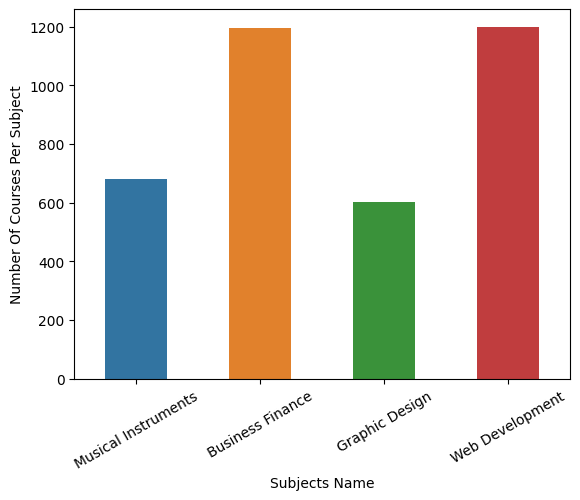

In [202]:
sns.countplot(x = df['subject'], width=.5)
plt.xlabel('Subjects Name')
plt.ylabel('Number Of Courses Per Subject')
plt.xticks(rotation =30)
plt.show()


For Which Levels, Udemy Courses Providing The Courses

In [203]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments


In [204]:
df["level"].value_counts()

All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

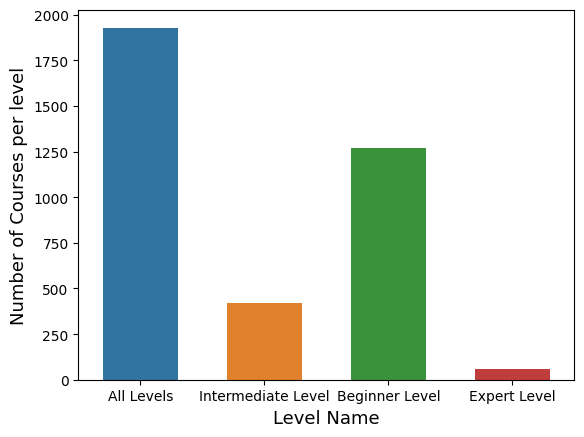

In [205]:
sns.countplot(x = df["level"], width=.6)
plt.xlabel('Level Name', fontsize = 13)
plt.ylabel('Number of Courses per level', fontsize = 13)
plt.show()

Display The Count of Paid and Free Courses 

In [206]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [207]:
df["is_paid"].value_counts()

True     3366
False     310
Name: is_paid, dtype: int64

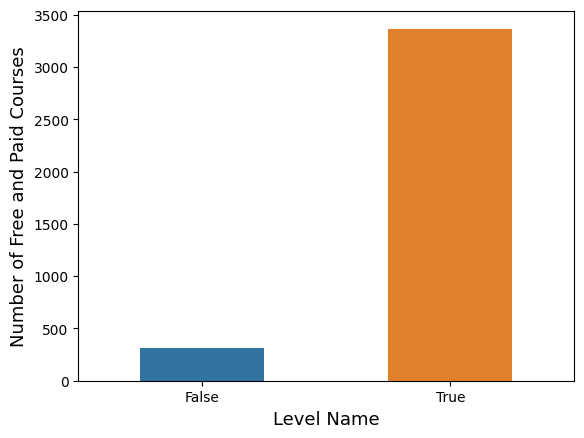

In [208]:
sns.countplot(x = df["is_paid"], width=.5)
plt.xlabel('Level Name', fontsize = 13)
plt.ylabel('Number of Free and Paid Courses', fontsize = 13)
plt.show()

Which Course Has More Lectures (Free or Paid)?

In [209]:
df.groupby(['is_paid']).mean()

,course_id,num_subscribers,num_reviews,num_lectures
is_paid,,,,
False,691446.970968,11533.951613,425.929032,21.416129
True,675165.977718,2418.997623,131.364231,41.816993


Which Courses Have A Higher Number of Subscribers Free or Paid?

Text(0, 0.5, 'Number of subscriber')

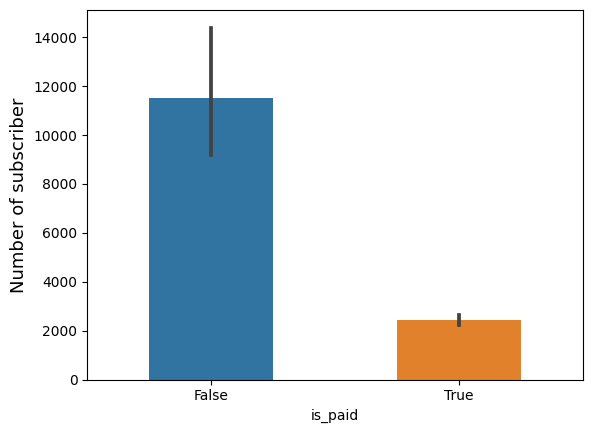

In [210]:
sns.barplot(x=df['is_paid'], y=df['num_subscribers'], width=.5)
plt.ylabel('Number of subscriber', fontsize =13)

 Which Level Has The Highest Number of Subscribers?

In [211]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

<AxesSubplot: xlabel='level', ylabel='num_subscribers'>

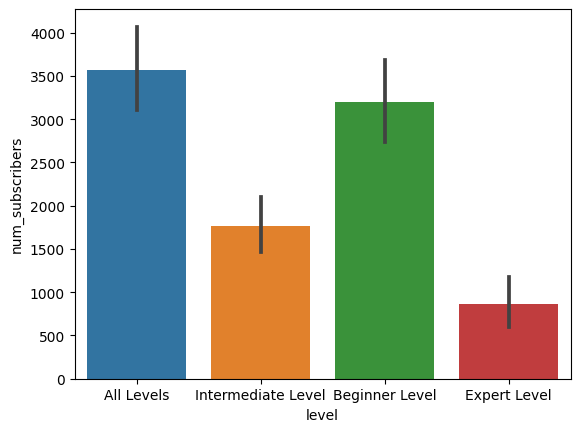

In [212]:
sns.barplot(x = 'level', y ='num_subscribers', data=df)

Find Most Popular Course Title

In [213]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [214]:
df[df['num_subscribers'].max() == df['num_subscribers']]['course_title']

2230    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

Display 10 Most Popular Courses As Per Number of Subscribers

In [215]:
top_10 = df.sort_values(by='num_subscribers', ascending=False).head(10)
top_10

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development
1388,19421,Free Beginner Electric Guitar Lessons,False,Free,101154,1042,95,Beginner Level,4.5 hours,2012-06-15 17:00:33+00:00,Musical Instruments
3556,473160,Web Design for Web Developers: Build Beautiful...,False,Free,98867,6512,20,All Levels,3 hours,2015-04-13 18:29:47+00:00,Web Development
2233,94430,Learn Javascript & JQuery From Scratch,True,30,84897,2685,10,All Levels,2 hours,2013-10-10 15:19:29+00:00,Web Development
2886,130064,Practical PHP: Master the Basics and Code Dyna...,False,Free,83737,4598,45,All Levels,6.5 hours,2014-07-19 03:02:05+00:00,Web Development
2034,364426,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5 hours,2015-03-12 23:19:54+00:00,Web Development


<AxesSubplot: xlabel='num_subscribers', ylabel='course_title'>

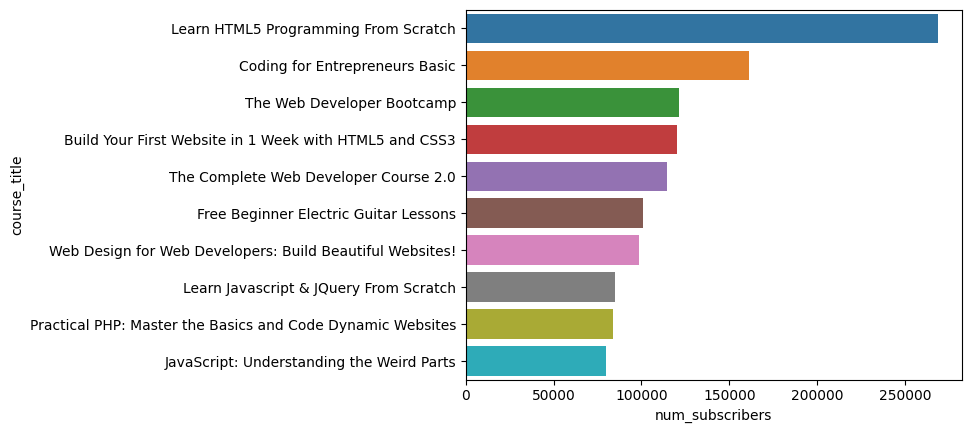

In [216]:
sns.barplot(x = 'num_subscribers', y = 'course_title', data = top_10)

 Find The Course Which Is Having The Highest Number of Reviews

In [217]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

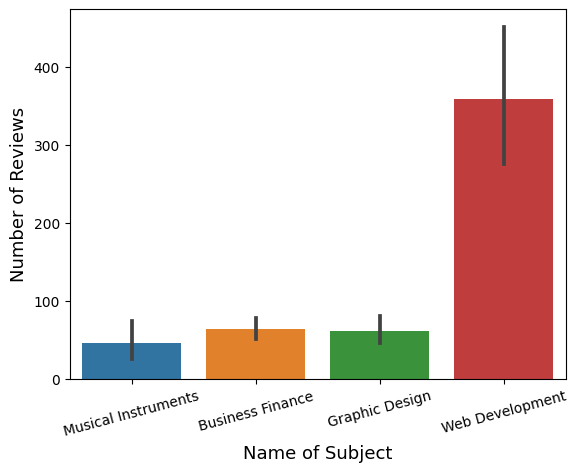

In [218]:
sns.barplot(x='subject', y='num_reviews', data=df)
plt.xticks(rotation=15)
plt.xlabel('Name of Subject',fontsize = 13)
plt.ylabel("Number of Reviews", fontsize = 13)
plt.show()

Does Price Affect the Number of Reviews?

In [219]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

<AxesSubplot: xlabel='price', ylabel='num_reviews'>

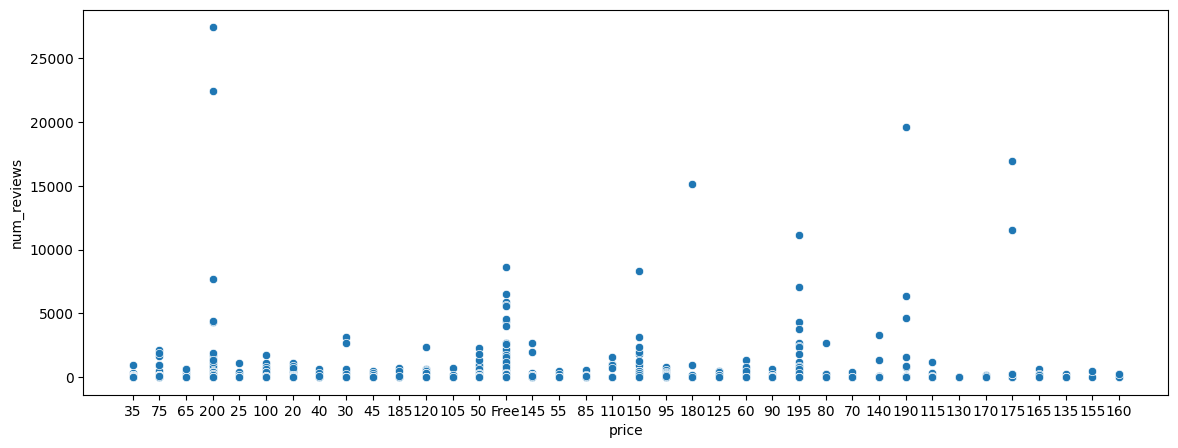

In [220]:
plt.figure(figsize = (14,5))
sns.scatterplot(x='price', y= "num_reviews", data= df)

Find Total Number of Courses Related To Python

In [221]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [222]:
print("Total Number of python course is",len(df[df['course_title'].str.contains('python', case=False)]))

Total Number of python course is 29


Display 10 Most Popular Python Courses As Per Number of Subscribers

In [223]:
python_course = df[df['course_title'].str.contains('python', case=False)]
top_ten_python_course = python_course.sort_values(by="num_subscribers", ascending=False).head(10)

<AxesSubplot: xlabel='num_subscribers', ylabel='course_title'>

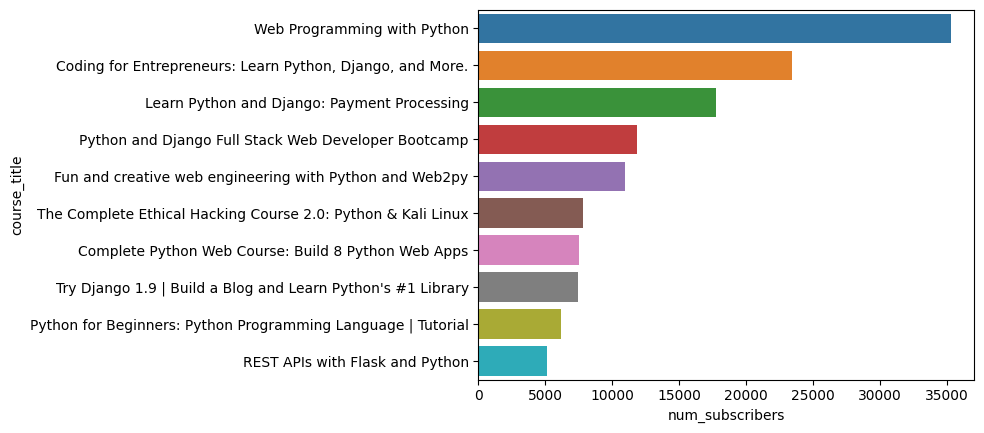

In [224]:
sns.barplot(x = "num_subscribers", y="course_title", data=top_ten_python_course)

 In Which Year The Highest Number of Courses Were Posted?

In [225]:
df["Year"] = df['published_timestamp'].dt.year

<AxesSubplot: xlabel='Year', ylabel='count'>

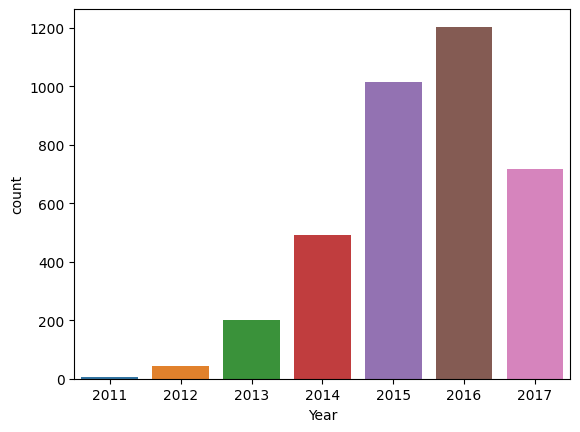

In [226]:
sns.countplot(x= 'Year', data=df)


 Display Category-Wise Count of Posted Subjects [Year Wise] 

In [227]:
df.groupby('Year')["subject"].value_counts()


Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       227
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64